In [3]:
# Declaracion de librerias 
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#Preparacion de las etiquetas, el dataset, y cargado del modelo para generar los datos para la matriz
names = ['Carne 2','Carne 3','Carne 4','Carne 5','Carne 6','Carne 7','Carne 8']
test_data_dir = './CarneDataset/train'  
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(100, 100), 
    batch_size = 10,
    class_mode='categorical', 
    shuffle=False)
custom_Model= load_model("./modelo/modelo.keras")
predictions = custom_Model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes

Found 1633 images belonging to 8 classes.
164/164 [==============================] - 20s 121ms/step


In [22]:
#Creacion de la matriz de confucion
matc=confusion_matrix(y_real, y_pred)

In [23]:
matc

array([[  0,   5,  55,   0,   0,   2,   0],
       [  0, 206,   0,   1,   0,   6,   0],
       [  0,   0,  99,   0,   0,   6,   0],
       [  0,  65,   0, 881,   0,   3,   0],
       [  0,   1,   0,   1,  25,  10,   0],
       [  0,  37,   1,   0,   0, 166,   0],
       [  0,   1,   0,  48,   0,   0,  14]], dtype=int64)

In [24]:
names

['Carne 2', 'Carne 3', 'Carne 4', 'Carne 5', 'Carne 6', 'Carne 7', 'Carne 8']

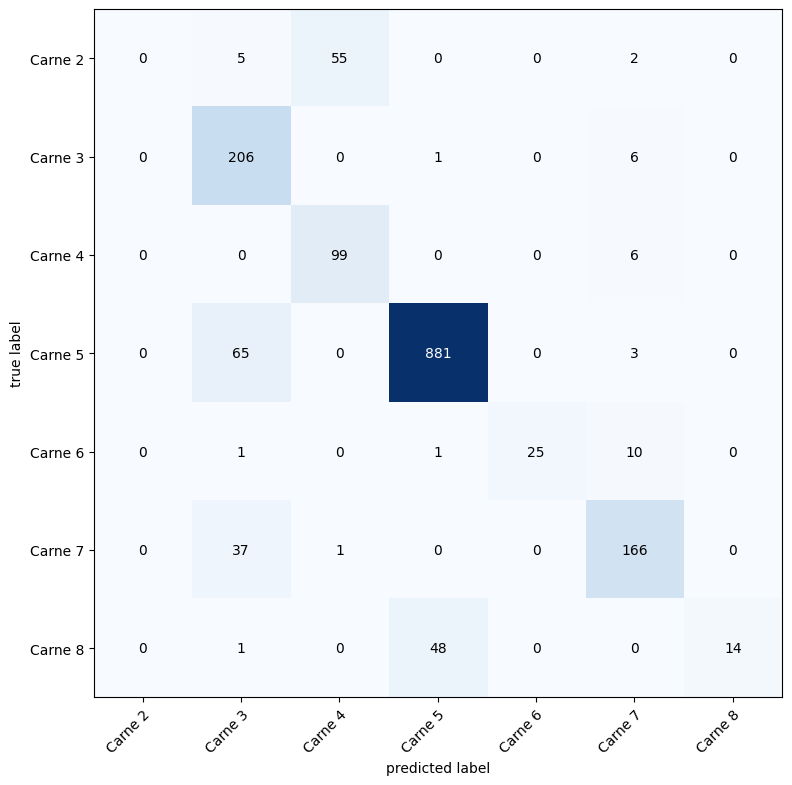

In [25]:
#Visualizacion de la matriz de confusion 
plot_confusion_matrix(conf_mat=matc, figsize=(8,8), class_names = names, show_normed=False)
plt.tight_layout()

In [26]:
#Impresion de metricas generadas por la matriz segun las clases existentes en el dataset
print(metrics.classification_report(y_real, y_pred, digits=2, zero_division=0))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        62
           2       0.65      0.97      0.78       213
           3       0.64      0.94      0.76       105
           4       0.95      0.93      0.94       949
           5       1.00      0.68      0.81        37
           6       0.86      0.81      0.84       204
           7       1.00      0.22      0.36        63

    accuracy                           0.85      1633
   macro avg       0.73      0.65      0.64      1633
weighted avg       0.84      0.85      0.83      1633

